In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file to inspect its contents
file_path = 'data/pred_merged/merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the file to understand its structure
data.head()

,CpG,SNP,Ref,Alt,CHR,CpG_POS,SNP_POS,cd4,mono,distance
0,cg07709195,rs968567,C,T,11,61586015,61595564,1.849606,2.058583,9549
1,cg08281583,rs968567,C,T,11,61595223,61595564,0.790297,0.534974,341
2,cg02563962,rs968567,C,T,11,61595550,61595564,1.959047,1.133236,14
3,cg20896974,rs968567,C,T,11,61595983,61595564,1.668733,0.748076,419
4,cg15454066,rs968567,C,T,11,61595377,61595564,0.345818,0.322111,187


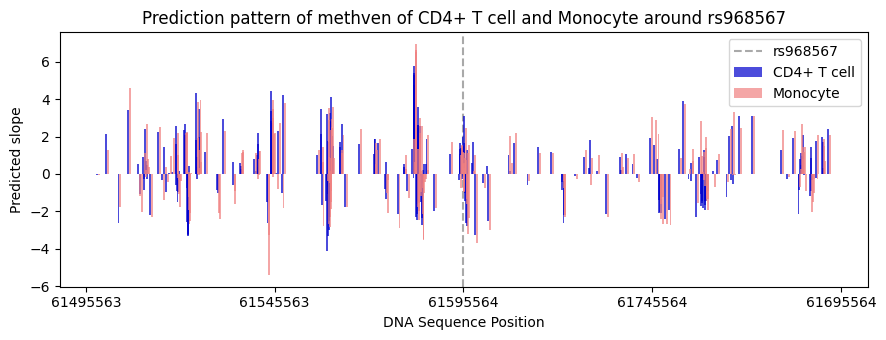

In [15]:
# Create a bar plot for CD4 and Mono values with SNP position as the center
plt.figure(figsize=(9, 3.5))

range_ = 100_000
snp_pos = data['SNP_POS'].unique()[0]  # Get the unique SNP position (since all rows refer to rs968567)
region_start = snp_pos - range_ - 1
region_end = snp_pos + range_

# Plot CD4 and Mono values as bars
bar_width = 500  # Set a width for the bars

# Highlight SNP position
plt.axvline(x=snp_pos, color='#A9A9A9', linestyle='--', label='rs968567', zorder=1)

# Bar plots for CD4 and Mono
plt.bar(data['CpG_POS'] - bar_width/2, data['cd4'], width=bar_width, label='CD4+ T cell', alpha=0.7, color='#0000CD', zorder=3)
plt.bar(data['CpG_POS'] + bar_width/2, data['mono'], width=bar_width, label='Monocyte', alpha=0.7, color='#F08080', zorder=3)

# Labels and title
plt.xlabel('DNA Sequence Position')
plt.ylabel('Predicted slope')
plt.title('Prediction pattern of methven of CD4+ T cell and Monocyte around rs968567')
plt.xticks([region_start,region_start+50000,snp_pos,region_end-50000,region_end],
            [str(region_start),str(region_start+50000),str(snp_pos),str(region_end+50000),str(region_end)])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('images/barplot-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

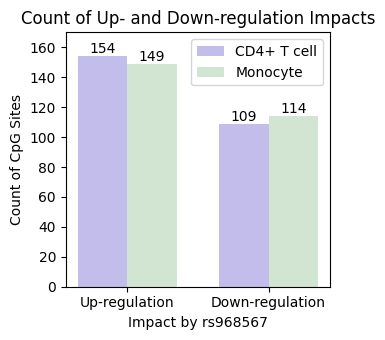

In [17]:
import matplotlib.pyplot as plt

# Assuming your data is loaded as a DataFrame named 'data'
data['cd4_class'] = data['cd4'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
data['mono_class'] = data['mono'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Count the number of positive and negative values for both CD4 and Mono
cd4_counts = data['cd4_class'].value_counts()
mono_counts = data['mono_class'].value_counts()

# Prepare data for plotting
labels = ['Up-regulation', 'Down-regulation']
cd4_values = [cd4_counts.get('Positive', 0), cd4_counts.get('Negative', 0)]
mono_values = [mono_counts.get('Positive', 0), mono_counts.get('Negative', 0)]

x = range(len(labels))  # X-axis positions for the groups
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(3.5, 3.5))

# Plot the bars
bars_cd4 = plt.bar([pos - bar_width/2 for pos in x], cd4_values, bar_width, label='CD4+ T cell', color='#6A5ACD',alpha=0.4)
bars_mono = plt.bar([pos + bar_width/2 for pos in x], mono_values, bar_width, label='Monocyte', color='#8FBC8F',alpha=0.4)

# Add labels and title
plt.xlabel('Impact by rs968567')
plt.ylabel('Count of CpG Sites')
plt.title('Count of Up- and Down-regulation Impacts')
plt.xticks(x, labels)
plt.ylim((0, 170))

# Add count annotations on top of the bars
for bar in bars_cd4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

for bar in bars_mono:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('images/barplot-count.png',dpi=300, bbox_inches = 'tight')
plt.show()
